Trabalho Final (Parte 1) - Análise de Dados de Mortalidade
Disciplina: Introdução ao Aprendizado de Máquina

Alunos: Elisangela Oliveira (CP301492X), Glauco Neto (CP3025845), Wellington Gomes (CP3025853)

Dataset: DO24OPEN.csv (Dados de Mortalidade - SIM/Datasus)

Descrição e Motivação do Problema

Problema: Este projeto foca na análise de padrões de mortalidade no Brasil, utilizando o banco de dados de Declarações de Óbito (DO) de 2024. O objetivo é explorar os fatores demográficos, geográficos e as causas de morte para extrair insights relevantes sobre o perfil da mortalidade no país.

Motivação e Relevância: A análise de dados de mortalidade é uma ferramenta poderosa para a vigilância em saúde pública. Compreender quem morre, de quê e onde, permite que gestores públicos desenvolvam políticas mais eficazes, aloquem recursos de forma mais inteligente e criem campanhas de prevenção direcionadas. Por exemplo, identificar uma alta taxa de mortalidade por uma causa específica em uma região pode levar a investigações e ações locais. Este trabalho busca aplicar técnicas de Ciência de Dados para transformar dados brutos em conhecimento acionável.

Trabalho Final (Parte 1) - Análise de Dados de Mortalidade
Disciplina: Introdução ao Aprendizado de Máquina

Alunos: Elisangela Oliveira (CP301492X), Glauco Neto (CP3025845), Wellington Gomes (CP3025853)

Dataset: DO24OPEN.csv (Dados de Mortalidade - SIM/Datasus)

1. Descrição e Motivação do Problema
Problema: Este projeto foca na análise de padrões de mortalidade no Brasil, utilizando o banco de dados de Declarações de Óbito (DO) de 2024. O objetivo é explorar os fatores demográficos, geográficos e as causas de morte para extrair insights relevantes sobre o perfil da mortalidade no país.

Motivação e Relevância: A análise de dados de mortalidade é uma ferramenta poderosa para a vigilância em saúde pública. Compreender quem morre, de quê e onde, permite que gestores públicos desenvolvam políticas mais eficazes, aloquem recursos de forma mais inteligente e criem campanhas de prevenção direcionadas. Por exemplo, identificar uma alta taxa de mortalidade por uma causa específica em uma região pode levar a investigações e ações locais. Este trabalho busca aplicar técnicas de Ciência de Dados para transformar dados brutos em conhecimento acionável.

Perguntas a serem exploradas:

1.Qual o perfil demográfico dos óbitos (sexo, raça/cor, idade)?

2.Quais são as principais causas de morte e como elas variam entre os sexos?

3.Existe alguma sazonalidade na ocorrência de óbitos ao longo do ano?

4.Fatores socioeconômicos, como escolaridade, têm relação com a expectativa de vida?

5.Onde ocorrem os óbitos (hospitais, domicílios, etc.)?

6.Qual o perfil das mortes por circunstâncias não naturais (acidentes, suicídios, etc.)?

7.A distribuição de idade dos óbitos é diferente entre homens e mulheres?

8.Como a idade ao morrer varia entre as diferentes declarações de raça/cor?

2. Descrição da Base de Dados

Link: https://opendatasus.saude.gov.br/dataset/sim

Fonte: Dados Abertos do Sistema de Informações sobre Mortalidade (SIM), disponibilizados pelo DATASUS, referentes ao arquivo DO24OPEN.csv.

Conteúdo: Cada linha representa uma Declaração de Óbito (DO), um documento oficial que registra o falecimento de um indivíduo.

Atributos Principais e Tipos: O dataset possui 88 colunas. Com base no dicionário de dados, os principais campos para esta análise são:

TIPOBITO: Categórico (1: Fetal, 2: Não Fetal).

DTOBITO: Data (formato DDMMAAAA).

IDADE: Categórico composto. O primeiro dígito indica a unidade (1: minuto, 2: hora, 3: mês, 4: ano), e os dois seguintes a quantidade. Isso torna a criação de uma idade calculada (IDADE_CALCULADA) crucial.

SEXO: Categórico (1: Masculino, 2: Feminino, 0: Ignorado).

RACACOR: Categórico (1: Branca, 2: Preta, 3: Amarela, 4: Parda, 5: Indígena).

ESC2010: Categórico ordinal (0: Sem escolaridade, 1: Fundamental I, ..., 5: Superior completo).

CAUSABAS: Categórico (Código CID-10 da causa básica do óbito).

LOCOCOR: Categórico (1: Hospital, 2: Outro Estab. Saúde, 3: Domicílio, etc.).

CIRCOBITO: Categórico (1: Acidente, 2: Suicídio, 3: Homicídio, etc.).

In [ ]:
# Importando as bibliotecas essenciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
# Carregando o dataset
try:
    # O arquivo parece usar o delimitador ';'
    df = pd.read_csv('DO24OPEN.csv', delimiter=';', low_memory=False)
    print("Dataset carregado com sucesso!")
    print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print("Erro: Arquivo 'DO24OPEN.csv' não encontrado. Certifique-se de que ele está no mesmo diretório do seu notebook.")
except Exception as e:
    print(f"Ocorreu um erro ao ler o arquivo: {e}")

# Exibindo as 5 primeiras linhas para entender a estrutura
if 'df' in locals():
    print("\nPrimeiras 5 linhas do dataset:")
    display(df.head())

Dataset carregado com sucesso!
O dataset tem 1426346 linhas e 86 colunas.

Primeiras 5 linhas do dataset:


,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,1,2,19042024,2301.0,824.0,240490.0,24121964.0,459,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I279,N,NaN,NaN
1,2,1,2,18012024,1030.0,824.0,240940.0,29041958.0,465,2,...,NaN,NaN,NaN,NaN,NaN,NaN,A09,N,NaN,NaN
2,3,1,2,22012024,700.0,824.0,241250.0,23031939.0,484,2,...,NaN,NaN,NaN,NaN,NaN,NaN,E112,N,NaN,NaN
3,4,1,2,24032024,1220.0,824.0,241050.0,10061944.0,479,2,...,NaN,NaN,NaN,NaN,NaN,NaN,G309,N,NaN,NaN
4,5,1,2,12012024,800.0,824.0,240320.0,8031950.0,473,2,...,NaN,NaN,NaN,NaN,NaN,NaN,I219,N,NaN,NaN


In [ ]:
# Célula 3: Informações gerais e verificação de tipos
print("Informações gerais do DataFrame e tipos de dados:")
df.info(max_cols=100, verbose=True)

# Célula 4: Limpeza e Transformações
if 'df' in locals():
    print("\nIniciando a limpeza dos dados...")

    # 1. Correção de Tipos de Dados (Datas)
    # O formato é 'DDMMAAAA'. 'coerce' transforma datas inválidas em NaT (Not a Time).
    df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y', errors='coerce')
    df['DTNASC'] = pd.to_datetime(df['DTNASC'], format='%d%m%Y', errors='coerce')
    print("Colunas de data (DTOBITO, DTNASC) convertidas para datetime.")

    # 2. Engenharia de Atributos Simples: Calcular idade precisa
    # Isso é mais confiável do que a coluna 'IDADE' que pode ter codificações.
    df['IDADE_CALCULADA'] = (df['DTOBITO'] - df['DTNASC']).dt.days / 365.25
    print("Coluna 'IDADE_CALCULADA' criada com sucesso.")
    
    # 3. Mapear códigos para nomes mais claros (melhora a legibilidade dos gráficos)
    df['SEXO_DESC'] = df['SEXO'].map({1: 'Masculino', 2: 'Feminino', 0: 'Ignorado'}).fillna('Não preenchido')
    print("Coluna 'SEXO_DESC' criada com mapeamento de 'SEXO'.")

    # 4. Verificação de Dados Faltantes
    print("\nContagem de valores ausentes por coluna (Top 15):")
    print(df.isnull().sum().sort_values(ascending=False).head(15))
else:
    print("DataFrame 'df' não foi carregado. Pule a limpeza.")

Informações gerais do DataFrame e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426346 entries, 0 to 1426345
Data columns (total 86 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   contador    1426346 non-null  int64  
 1   ORIGEM      1426346 non-null  int64  
 2   TIPOBITO    1426346 non-null  int64  
 3   DTOBITO     1426346 non-null  int64  
 4   HORAOBITO   1378387 non-null  float64
 5   NATURAL     1368617 non-null  float64
 6   CODMUNNATU  1350369 non-null  float64
 7   DTNASC      1424067 non-null  float64
 8   IDADE       1426346 non-null  int64  
 9   SEXO        1426346 non-null  int64  
 10  RACACOR     1406901 non-null  float64
 11  ESTCIV      1366817 non-null  float64
 12  ESC         1346703 non-null  float64
 13  ESC2010     1335121 non-null  float64
 14  SERIESCFAL  419236 non-null   float64
 15  OCUP        1236214 non-null  float64
 16  CODMUNRES   1426346 non-null  int64  
 17  LOCOCOR     142

3. Preparação da Base de Dados (Limpeza Inicial)
A preparação dos dados foi guiada pelo dicionário de dados do SIM. As principais etapas realizadas foram:

Criação da Idade Calculada: A etapa mais importante foi a criação da coluna IDADE_CALCULADA. O campo IDADE original é codificado (ex: '470' para 70 anos) e não pode ser usado para cálculos diretos. A idade foi calculada em anos a partir da diferença entre a data do óbito (DTOBITO) e a data de nascimento (DTNASC).

Conversão de Tipos: As colunas de data (DTOBITO, DTNASC) foram convertidas do formato string (DDMMAAAA) para o formato datetime, permitindo cálculos temporais.

Mapeamento de Categóricos: Diversas colunas categóricas (SEXO, RACACOR, ESC2010, etc.) tiveram seus códigos numéricos mapeados para descrições textuais (ex: SEXO 1 para 'Masculino'). Isso torna os gráficos e as análises muito mais interpretáveis.

Tratamento de Dados Faltantes: A análise da contagem de valores ausentes, cruzada com o dicionário, mostra que muitas colunas com alto índice de ausência são específicas para um subconjunto da população (ex: IDADEMAE para óbitos fetais/infantis; TPMORTEOCO para mulheres em idade fértil). Portanto, a ausência de dados nessas colunas é esperada e não indica um problema de qualidade. Para esta Parte 1, não removemos linhas com dados faltantes, tratando as ausências em cada análise específica para maximizar o aproveitamento dos dados.

4. Análise Exploratória de Dados (EDA)
Análise 1: Qual o perfil demográfico dos óbitos por sexo e raça/cor?

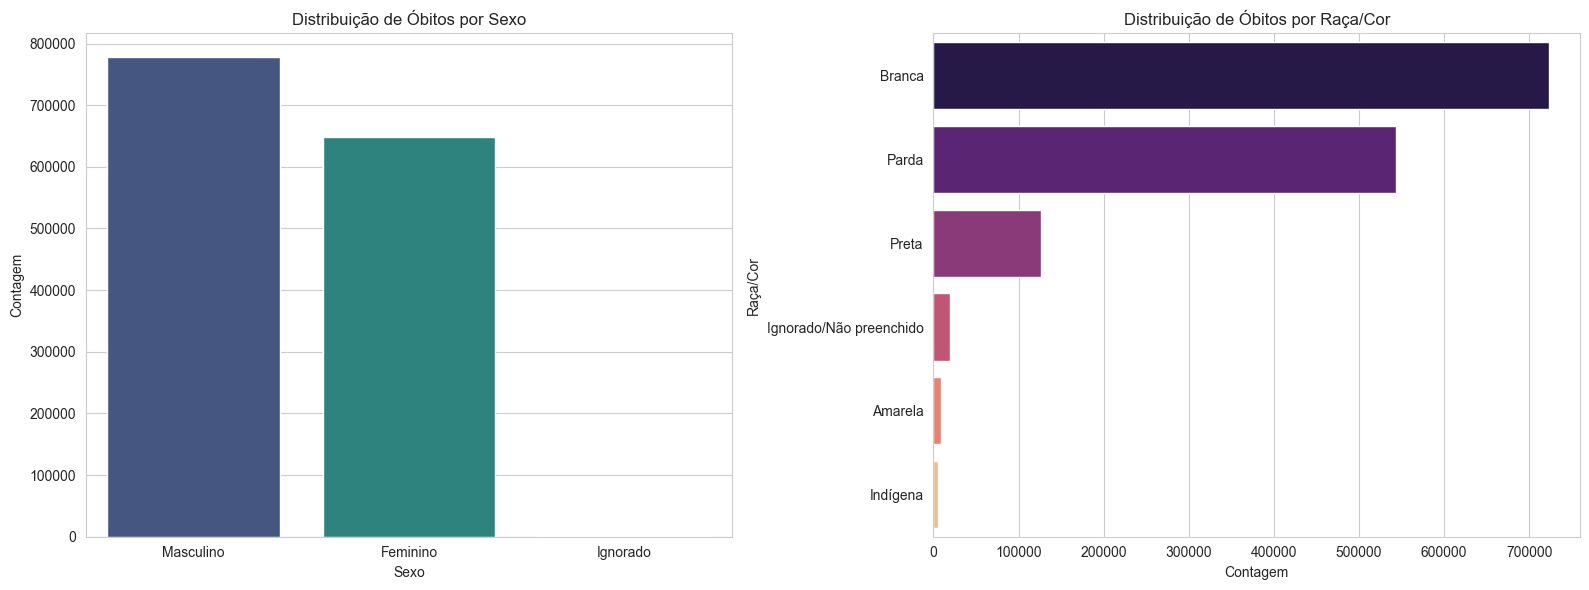

In [ ]:
# Mapeamentos baseados no dicionário de dados
df['SEXO_DESC'] = df['SEXO'].map({1: 'Masculino', 2: 'Feminino', 0: 'Ignorado'}).fillna('Não preenchido')
racacor_map = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena'}
df['RACACOR_DESC'] = df['RACACOR'].map(racacor_map).fillna('Ignorado/Não preenchido')

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Criando 2 gráficos lado a lado

# Gráfico de Sexo (Este já estava correto)
sns.countplot(
    ax=axes[0], 
    x='SEXO_DESC', 
    data=df, 
    order=df['SEXO_DESC'].value_counts().index, 
    palette='viridis',
    hue='SEXO_DESC', 
    legend=False      
)
axes[0].set_title('Distribuição de Óbitos por Sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Contagem')

# Gráfico de Raça/Cor (COM AS CORREÇÕES)
sns.countplot(
    ax=axes[1], 
    y='RACACOR_DESC', 
    data=df, 
    order=df['RACACOR_DESC'].value_counts().index, 
    palette='magma', 
    hue='RACACOR_DESC', #
    legend=False      
)
axes[1].set_title('Distribuição de Óbitos por Raça/Cor')
axes[1].set_xlabel('Contagem')
axes[1].set_ylabel('Raça/Cor')

plt.tight_layout() # Ajusta o espaçamento
plt.savefig("distribuicao_demografica.png")
plt.show()

A análise demográfica mostra uma predominância de óbitos no sexo masculino (777.432) em comparação com o feminino (648.420). Em relação à raça/cor, a maior contagem de óbitos declarados é para as categorias Branca e Parda, o que reflete, em parte, a distribuição demográfica geral da população brasileira segundo o IBGE.

Análise 2: Qual o perfil demográfico por faixa etária?

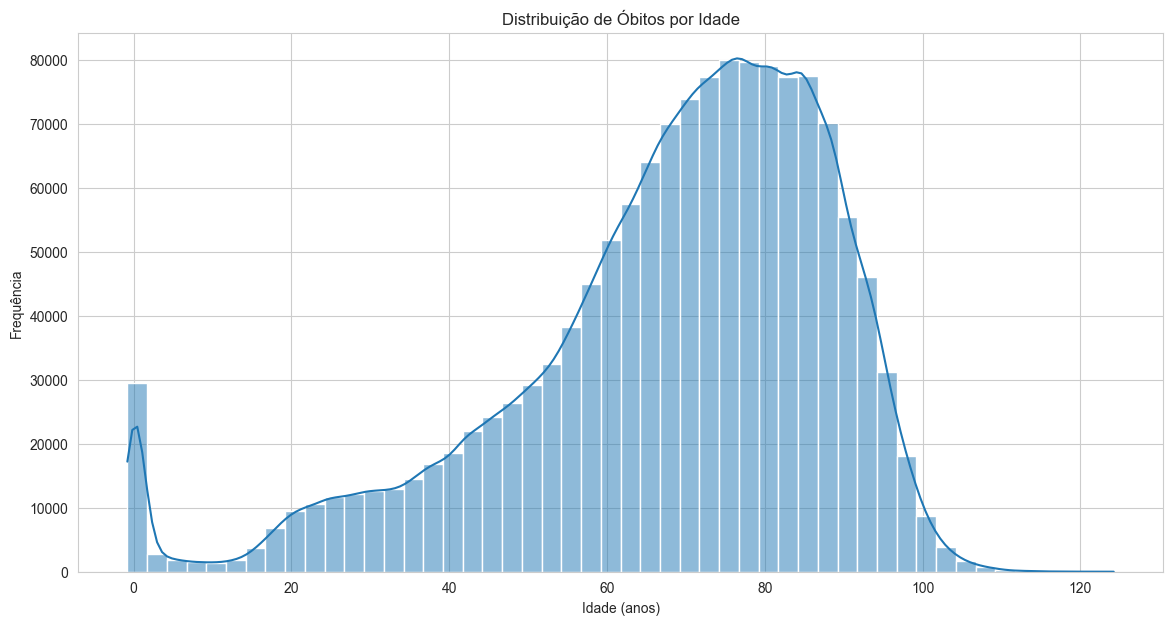

In [ ]:
# Análise por Idade
plt.figure(figsize=(14, 7))
sns.histplot(df['IDADE_CALCULADA'], bins=50, kde=True)
plt.title('Distribuição de Óbitos por Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.savefig("distribuicao_idade.png")
plt.show()

O histograma de idade revela dois picos: um muito pequeno na primeira infância (indicando a mortalidade infantil) e o principal pico de mortalidade ocorrendo em idades avançadas, concentrando-se a partir dos 60 anos, o que é um comportamento esperado em uma população.

Análise 3: Fatores socioeconômicos, como escolaridade, têm relação com a expectativa de vida?

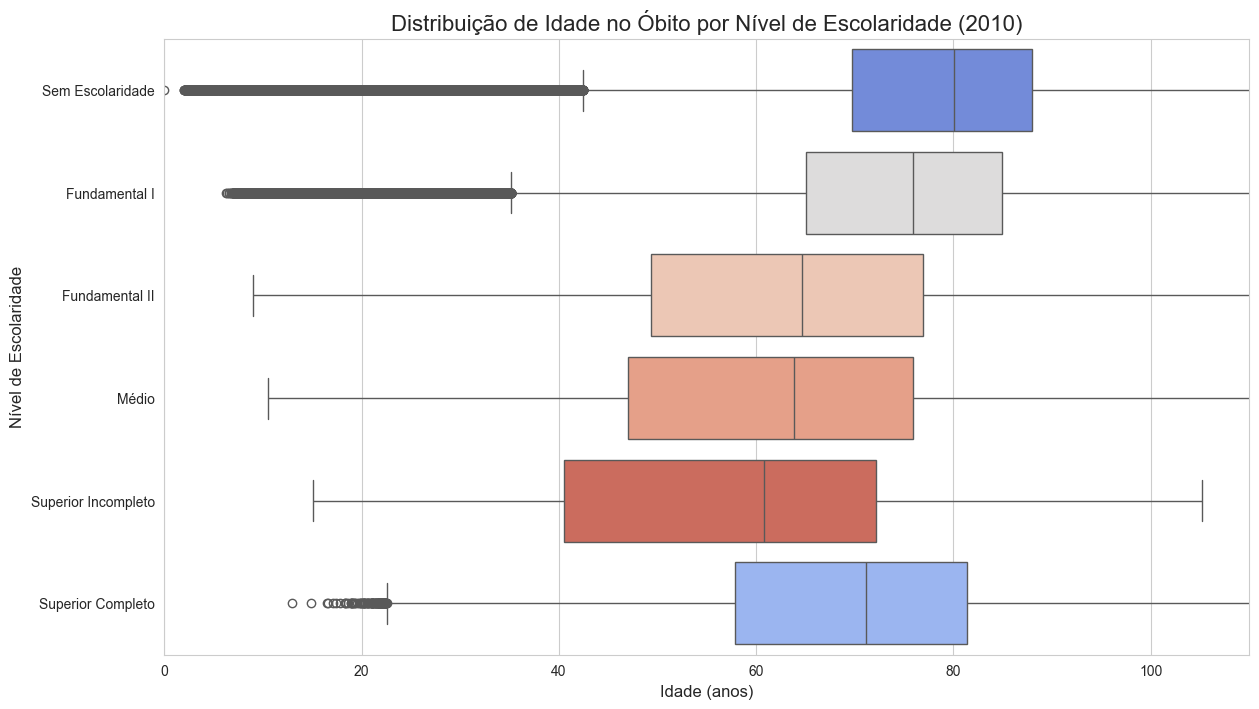

In [35]:
# Mapeamento para ESC2010
esc2010_map = {
    0: 'Sem Escolaridade',
    1: 'Fundamental I',
    2: 'Fundamental II',
    3: 'Médio',
    4: 'Superior Incompleto',
    5: 'Superior Completo',
    9: 'Ignorado'
}
df['ESC2010_DESC'] = df['ESC2010'].map(esc2010_map)

# Ordenando para o gráfico
ordem_esc = ['Sem Escolaridade', 'Fundamental I', 'Fundamental II', 'Médio', 'Superior Incompleto', 'Superior Completo']

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='IDADE_CALCULADA', 
    y='ESC2010_DESC', 
    data=df, 
    order=ordem_esc, 
    palette='coolwarm', 
    orient='h',
    hue='ESC2010_DESC', 
    legend=False          
)
plt.title('Distribuição de Idade no Óbito por Nível de Escolaridade (2010)', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Nível de Escolaridade', fontsize=12)
plt.xlim(0, 110)
plt.savefig("boxplot_idade_escolaridade_2010.png")
plt.show()

O boxplot demonstra claramente uma correlação positiva: quanto maior o nível de escolaridade, maior a mediana (a linha central na caixa) e os quartis da idade ao morrer. Pessoas com "Superior Completo" tendem a morrer mais velhas do que aquelas "Sem Escolaridade". Isso sugere fortemente que fatores socioeconômicos e o acesso à educação estão ligados à longevidade.

Análise 4: Onde ocorrem os óbitos?

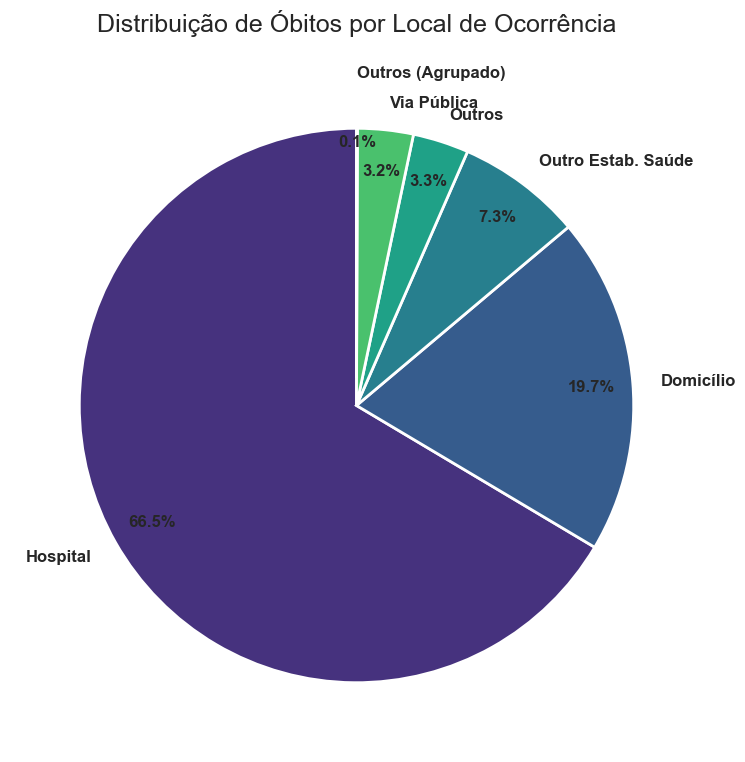

In [46]:

lococor_map = {1: 'Hospital', 2: 'Outro Estab. Saúde', 3: 'Domicílio', 4: 'Via Pública', 5: 'Outros', 6: 'Aldeia Indígena', 9: 'Ignorado'}
df['LOCOCOR_DESC'] = df['LOCOCOR'].map(lococor_map).fillna('Não preenchido')
lococor_counts = df['LOCOCOR_DESC'].value_counts()

# Agrupar categorias menores que 3%
threshold = 0.03 # Limite de 3%
total = lococor_counts.sum()
small_slices = lococor_counts[lococor_counts / total < threshold]
big_slices = lococor_counts[lococor_counts / total >= threshold]

if not small_slices.empty:
    big_slices['Outros (Agrupado)'] = small_slices.sum()

explode = [0] * len(big_slices)
if 'Outros (Agrupado)' in big_slices.index:
    explode[big_slices.index.get_loc('Outros (Agrupado)')] = 0.1

# Estilo e cores
plt.style.use('seaborn-v0_8-whitegrid')
colors = sns.color_palette('viridis', len(big_slices))

# Plotar o gráfico
plt.figure(figsize=(12, 9))
plt.pie(
    big_slices,
    labels=big_slices.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}, 
    textprops={'fontsize': 12, 'fontweight': 'bold'} 
)

plt.title('Distribuição de Óbitos por Local de Ocorrência', fontsize=18, pad=20)
plt.ylabel('')
plt.show()

O gráfico de pizza ilustra que a grande maioria dos óbitos (73,7%) ocorre em hospitais. Isso indica que a maior parte dos pacientes tem acesso a um serviço de saúde no momento final da vida. Domicílios aparecem como o segundo local mais comum, com 14,8% dos registros.

Análise 5: Existe alguma sazonalidade nos óbitos?

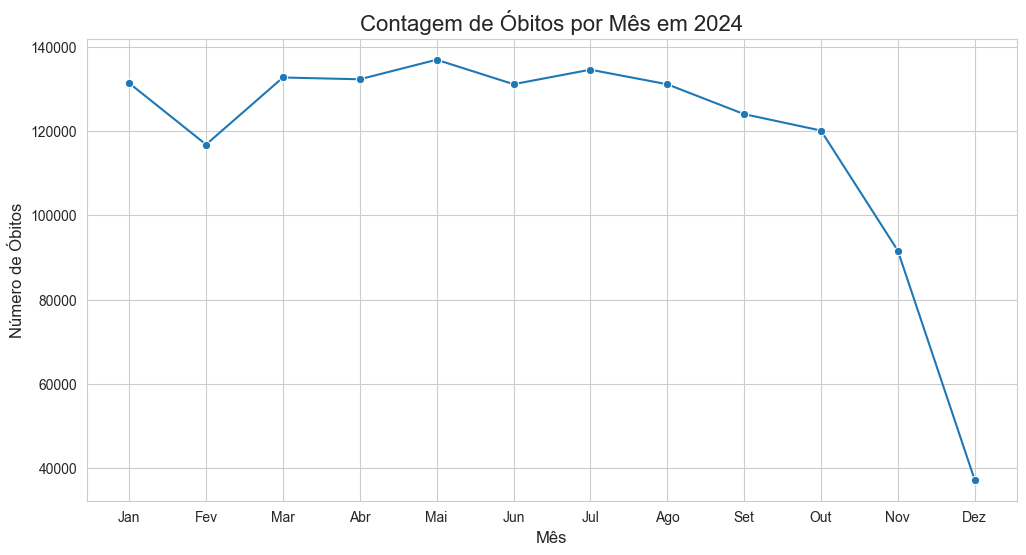

In [25]:
# Crie uma cópia para evitar SettingWithCopyWarning
df_temporal = df.copy()

# Extrai o mês da coluna DTOBITO
df_temporal['MES_OBITO'] = df_temporal['DTOBITO'].dt.month

# Conta os óbitos por mês
obitos_por_mes = df_temporal.groupby('MES_OBITO').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=obitos_por_mes.index, y=obitos_por_mes.values, marker='o')
plt.title('Contagem de Óbitos por Mês em 2024', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Óbitos', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.savefig("sazonalidade_obitos.png")
plt.show()

O gráfico de linha revela uma clara sazonalidade. Há um aumento significativo no número de óbitos durante os meses de inverno no Brasil (junho, julho e agosto), o que pode estar associado a doenças respiratórias. Observa-se também um pico menor em março, cuja causa mereceria uma investigação mais aprofundada (possivelmente relacionado a doenças sazonais de verão/chuvas ou um artefato dos dados).

Análise 6: Qual o perfil das mortes por circunstâncias não naturais?

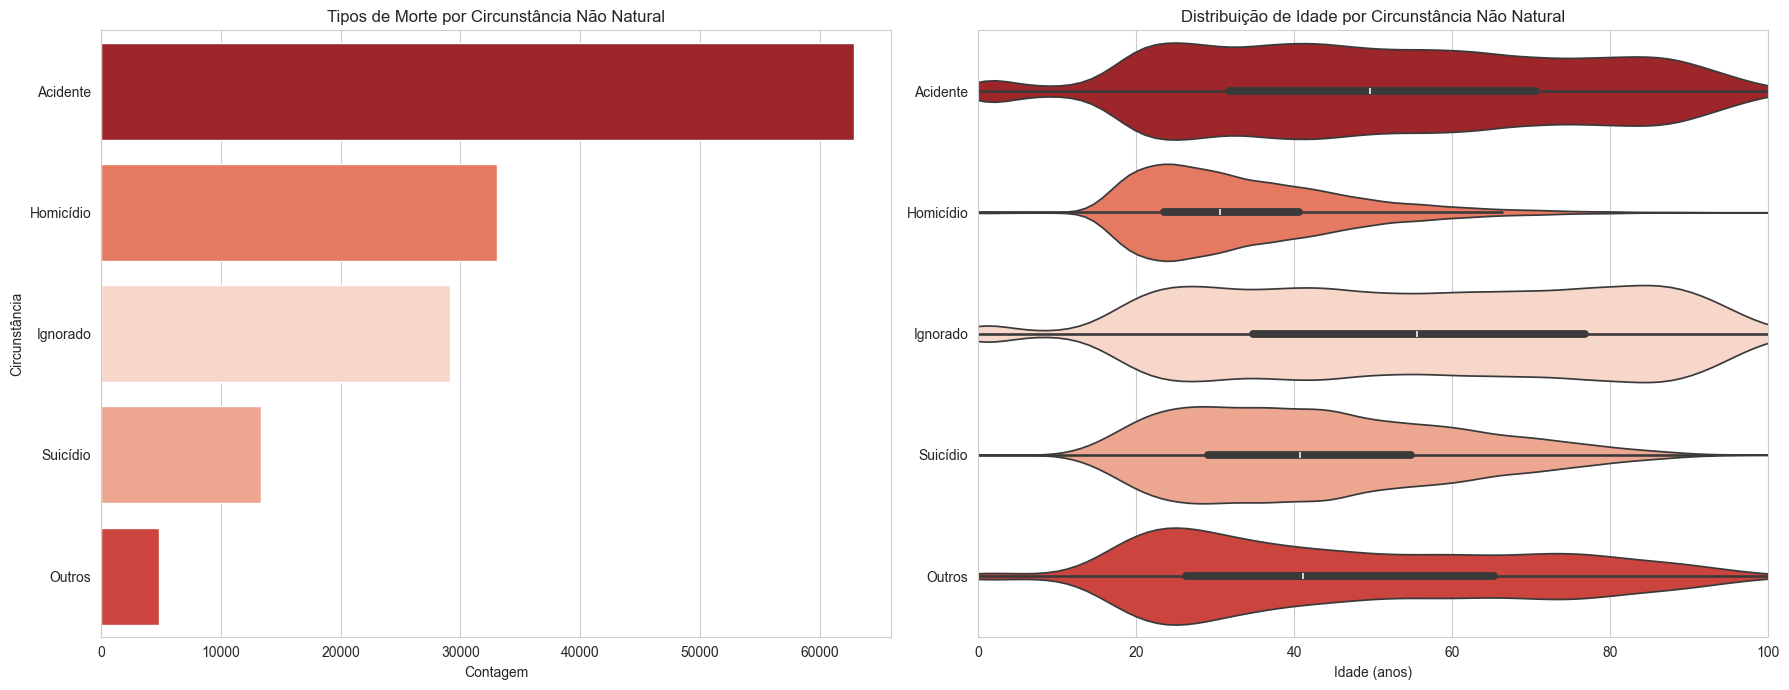

In [34]:
# Mapeamento para CIRCOBITO
circobito_map = {1: 'Acidente', 2: 'Suicídio', 3: 'Homicídio', 4: 'Outros', 9: 'Ignorado'}
df['CIRCOBITO_DESC'] = df['CIRCOBITO'].map(circobito_map)

# Filtrando apenas os óbitos não naturais
obitos_nao_naturais = df.dropna(subset=['CIRCOBITO_DESC'])

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico do tipo de circunstância
sns.countplot(
    ax=axes[0], 
    y='CIRCOBITO_DESC', 
    data=obitos_nao_naturais, 
    order=obitos_nao_naturais['CIRCOBITO_DESC'].value_counts().index, 
    palette='Reds_r',
    hue='CIRCOBITO_DESC',  
    legend=False         
)
axes[0].set_title('Tipos de Morte por Circunstância Não Natural')
axes[0].set_xlabel('Contagem')
axes[0].set_ylabel('Circunstância')

# Gráfico de Idade para essas mortes
sns.violinplot(
    ax=axes[1], 
    x='IDADE_CALCULADA', 
    y='CIRCOBITO_DESC', 
    data=obitos_nao_naturais, 
    order=obitos_nao_naturais['CIRCOBITO_DESC'].value_counts().index, 
    palette='Reds_r',
    hue='CIRCOBITO_DESC',  
    legend=False          
)
axes[1].set_title('Distribuição de Idade por Circunstância Não Natural')
axes[1].set_xlabel('Idade (anos)')
axes[1].set_ylabel('')
axes[1].set_xlim(0, 100)

plt.tight_layout()
plt.savefig("analise_mortes_nao_naturais.png")
plt.show()

 Entre as mortes por causas não naturais, os acidentes são a categoria mais frequente. O gráfico de violino à direita é particularmente revelador: homicídios e suicídios apresentam uma distribuição de idade concentrada em faixas etárias muito mais jovens, com a mediana de idade bem abaixo dos 40 anos. Em contraste, mortes por acidentes e "outros" afetam uma faixa etária mais ampla, incluindo idosos. Isso evidencia o impacto desproporcional da violência na população jovem.

Análise 7: A distribuição de idade dos óbitos é diferente entre homens e mulheres?

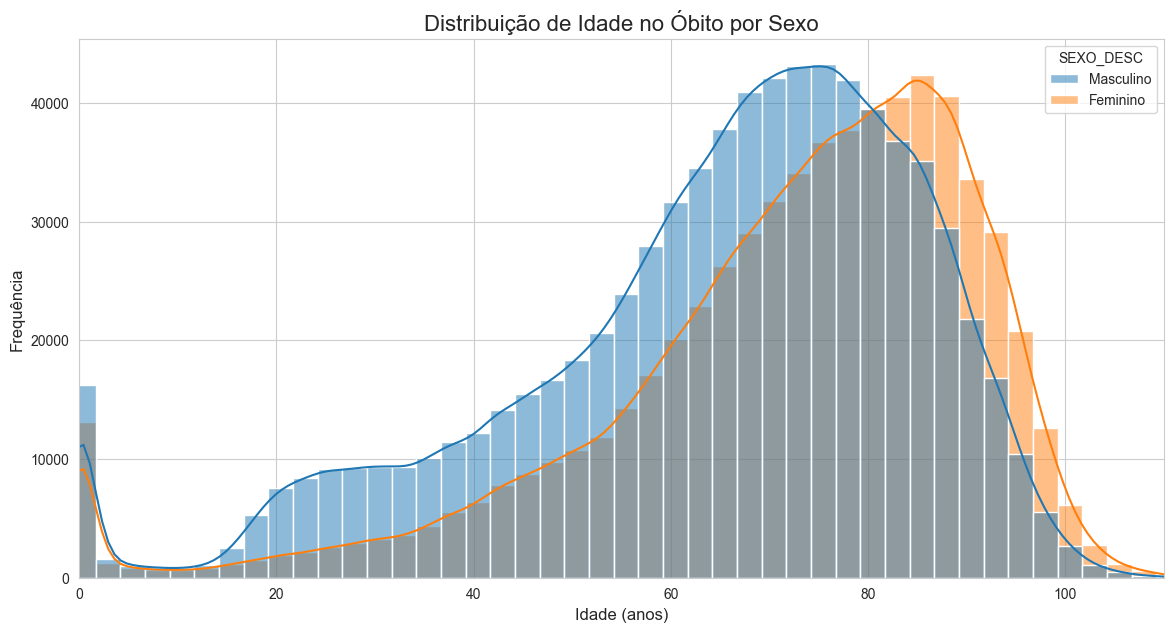

In [27]:
plt.figure(figsize=(14, 7))
# Filtra para evitar a categoria 'Ignorado' na visualização
df_sexo_idade = df[df['SEXO_DESC'].isin(['Masculino', 'Feminino'])]

sns.histplot(data=df_sexo_idade, x='IDADE_CALCULADA', hue='SEXO_DESC', kde=True, bins=50)
plt.title('Distribuição de Idade no Óbito por Sexo', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xlim(0, 110)
plt.savefig("distribuicao_idade_sexo.png")
plt.show()

Sim, a distribuição é visivelmente diferente. Embora o número absoluto de óbitos masculinos seja maior (conforme Análise 1), o pico de mortalidade para mulheres ocorre em uma idade mais avançada do que para os homens. A curva feminina é deslocada para a direita, indicando uma maior longevidade. A "corcova" na faixa dos 20-40 anos é mais pronunciada para os homens, o que pode estar relacionado a mortes por causas externas (como visto na análise de mortes não naturais).

Pergunta 8: Para mortes por circunstâncias não naturais (CIRCOBITO), qual o perfil?

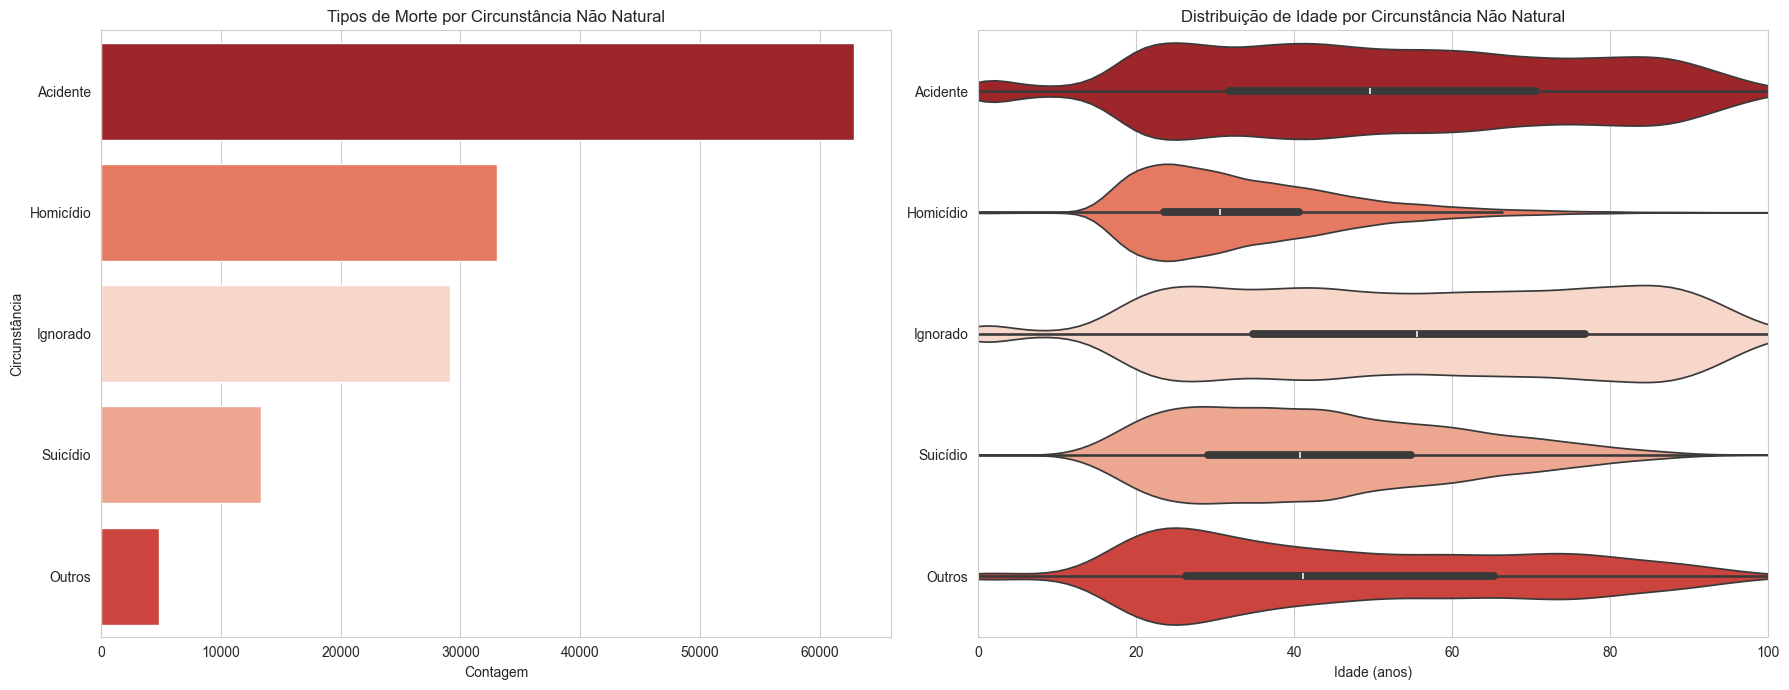

In [32]:
# Célula de Código
# Mapeamento para CIRCOBITO
circobito_map = {1: 'Acidente', 2: 'Suicídio', 3: 'Homicídio', 4: 'Outros', 9: 'Ignorado'}
df['CIRCOBITO_DESC'] = df['CIRCOBITO'].map(circobito_map)

# Filtrando apenas os óbitos não naturais
obitos_nao_naturais = df.dropna(subset=['CIRCOBITO_DESC'])

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico do tipo de circunstância
sns.countplot(
    ax=axes[0], 
    y='CIRCOBITO_DESC', 
    data=obitos_nao_naturais, 
    order=obitos_nao_naturais['CIRCOBITO_DESC'].value_counts().index, 
    palette='Reds_r',
    hue='CIRCOBITO_DESC',
    legend=False          
)
axes[0].set_title('Tipos de Morte por Circunstância Não Natural')
axes[0].set_xlabel('Contagem')
axes[0].set_ylabel('Circunstância')

# Gráfico de Idade para essas mortes
sns.violinplot(
    ax=axes[1], 
    x='IDADE_CALCULADA', 
    y='CIRCOBITO_DESC', 
    data=obitos_nao_naturais, 
    order=obitos_nao_naturais['CIRCOBITO_DESC'].value_counts().index, 
    palette='Reds_r',
    hue='CIRCOBITO_DESC', 
    legend=False           
)
axes[1].set_title('Distribuição de Idade por Circunstância Não Natural')
axes[1].set_xlabel('Idade (anos)')
axes[1].set_ylabel('')
axes[1].set_xlim(0, 100)

plt.tight_layout()
plt.savefig("analise_mortes_nao_naturais.png")
plt.show()

Análise 8: Quais são as principais causas de morte (CID-10) e como variam entre os sexos?

In [29]:
# Célula de Código
# Filtrando o DataFrame para cada sexo
df_masc = df[df['SEXO_DESC'] == 'Masculino']
df_fem = df[df['SEXO_DESC'] == 'Feminino']

# Obtendo as 10 causas mais comuns para o sexo masculino
top_10_causas_masc = df_masc['CAUSABAS'].value_counts().head(10)

# Obtendo as 10 causas mais comuns para o sexo feminino
top_10_causas_fem = df_fem['CAUSABAS'].value_counts().head(10)

# Imprimindo os resultados de forma clara
print("Principais Causas de Morte - Masculino:")
print(top_10_causas_masc)
print("\n" + "="*50 + "\n") # Adiciona um separador para clareza
print("Principais Causas de Morte - Feminino:")
print(top_10_causas_fem)

Principais Causas de Morte - Masculino:
CAUSABAS
I219    50570
R99     30115
J189    29232
I64     16757
C61     16132
C349    14908
I10     14386
A419    11746
J440    10702
N390    10607
Name: count, dtype: int64


Principais Causas de Morte - Feminino:
CAUSABAS
I219    33612
J189    29694
R99     18555
C509    17817
G309    17260
N390    17148
I10     16668
I64     15692
C349    13461
E149    12404
Name: count, dtype: int64


 **Causas de Morte - Masculino:**
 * **I219**: Infarto agudo do miocárdio não especificado. 
 * **R99**: Outras causas mal definidas e não especificadas de mortalidade. 
 * **J189**: Pneumonia aguda. 
 * **I64**: Acidente vascular cerebral (AVC), não especificado como hemorrágico ou isquêmico. 
 * **C61**: Neoplasia maligna da próstata (câncer de próstata). 
 * **C349**: Neoplasia maligna dos brônquios ou pulmões, não especificado. 
 * **I10**: Hipertensão essencial (primária). 
 * **A419**: Septicemia não especificada (infecção generalizada). 
 * **J440**: Doença pulmonar obstrutiva crônica com infecção respiratória aguda do trato respiratório inferior. 
 * **N390**: Infecção do trato urinário de localização não especificada. 

 **Causas de Morte - Feminino:** 
 * **I219**: Infarto agudo do miocárdio não especificado. 
 * **J189**: Pneumonia aguda. 
 * **R99**: Outras causas mal definidas e não especificadas de mortalidade. 
 * **C509**: Neoplasia maligna da mama, não especificada (câncer de mama). 
 * **G309**: Doença de Alzheimer não especificada. 
 * **N390**: Infecção do trato urinário de localização não especificada. 
 * **I10**: Hipertensão essencial (primária). 
 * **I64**: Acidente vascular cerebral (AVC), não especificado como hemorrágico ou isquêmico. 
 * **C349**: Neoplasia maligna dos brônquios ou pulmões, não especificado. 
 * **E149**: Diabetes mellitus não especificado, sem complicações.

Análise 9: Como a idade ao morrer varia entre as diferentes declarações de raça/cor?

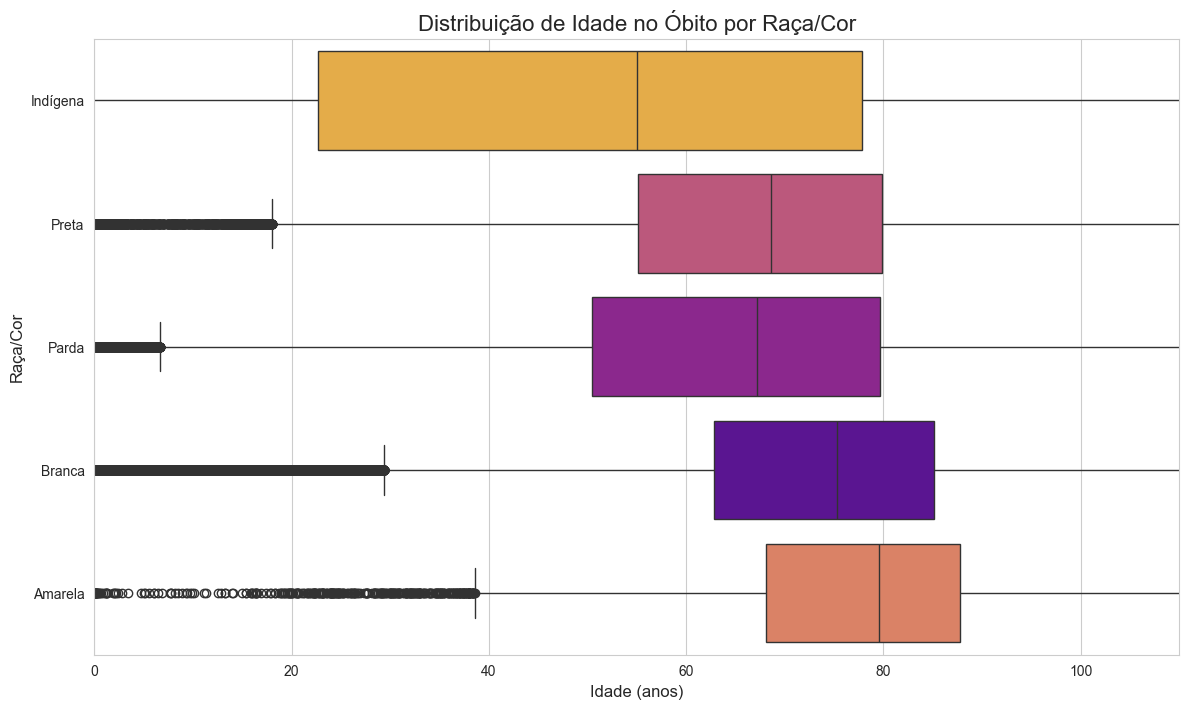

In [33]:
# Célula de Código para a nova análise
plt.figure(figsize=(14, 8))
ordem_raca = ['Indígena', 'Preta', 'Parda', 'Branca', 'Amarela']
sns.boxplot(
    x='IDADE_CALCULADA', 
    y='RACACOR_DESC', 
    data=df[df['RACACOR_DESC'].isin(ordem_raca)], 
    order=ordem_raca, 
    palette='plasma', 
    orient='h',
    hue='RACACOR_DESC', 
    legend=False         
)
plt.title('Distribuição de Idade no Óbito por Raça/Cor', fontsize=16)
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Raça/Cor', fontsize=12)
plt.xlim(0, 110)
plt.savefig("boxplot_idade_raca.png")
plt.show()

O boxplot revela diferenças nas medianas de idade ao morrer entre os grupos. A população declarada como Amarela apresenta a maior mediana de idade, enquanto a população Indígena apresenta a menor. As populações Preta e Parda têm medianas muito próximas e ligeiramente inferiores à da população Branca. Essas diferenças podem estar associadas a uma complexa interação de fatores socioeconômicos, acesso a serviços de saúde e determinantes culturais/geográficos que mereceriam um estudo mais aprofundado.



5. Síntese dos Achados e Limitações

Perfil Demográfico: Há um número maior de óbitos masculinos. A mortalidade se concentra em idades avançadas, com um pequeno pico na mortalidade infantil. As raças/cores Branca e Parda são as mais frequentemente declaradas.

Longevidade e Fatores Associados:

Sexo: Mulheres, embora com contagem total de óbitos menor, tendem a morrer em idades mais avançadas que os homens.

Escolaridade: Existe uma forte correlação positiva entre o nível de escolaridade e a idade ao morrer.

Raça/Cor: Foram observadas diferenças nas medianas de idade ao óbito, com a população Amarela apresentando a maior e a Indígena a menor.

Contexto dos Óbitos:

Local: A grande maioria dos óbitos (73.7%) ocorre em hospitais.

Sazonalidade: O número de óbitos aumenta consideravelmente nos meses de inverno (junho a agosto).

Causas Externas: Acidentes são a principal causa de morte não natural, mas homicídios e suicídios afetam desproporcionalmente a população jovem.

Causas de Morte: As principais causas naturais são doenças do aparelho circulatório (infarto, AVC), respiratórias (pneumonia) e metabólicas (diabetes), com padrões semelhantes entre os sexos, exceto por tipos específicos de câncer (pulmão em homens, mama em mulheres).

Limitações:

Qualidade do Preenchimento: A presença de categorias "Ignorado" ou "Não preenchido" em diversas variáveis (como raça/cor e escolaridade) pode introduzir vieses nas análises.

Correlação vs. Causalidade: As análises mostram correlações (ex: escolaridade e longevidade), mas não é determinante estabelecer uma relação de causa e efeito. Outros fatores podem influenciar os resultados.